# Include Librarie(s)

In [1]:
import os
import pandas as pd
import numpy as np
import json

# Plotting
import matplotlib.pyplot as plt

# Load Data From CSV File

The following function will load the data from the CSV file and return a pandas dataframe.

In [2]:
def load_csi_matrix_from_file(csv_path: str):
    """
    ‰ªéËß£ÊûêÂ•ΩÁöÑcsvÊñá‰ª∂‰∏≠ËØªÂèñcsiÁü©ÈòµÔºåÁü©ÈòµÈÄöÂ∏∏ÊòØ‰∏Ä‰∏™ 3 x 3 x 114 ÁöÑÁü©Èòµ
    Load csi matrix from the parsed csv file, the matrix is usually a 3 x 3 x 114 matrix

    @param csv_path: the path of the csv file

    @return: the csi matrix
    """

    # È™åËØÅÔºåËã•csvÊñá‰ª∂‰∏çÂ≠òÂú®ÔºåÂàôËøîÂõû‰∏Ä‰∏™NullÂÄº
    # if the csv file does not exist, return a Null value
    if not os.path.isfile(csv_path):
        print("The csv file is not valid!")
        return None

    # ËØªÂèñcsvÁü©Èòµ
    # read the csv matrix
    csi_pd = pd.read_csv(csv_path, sep='\t', encoding='utf-8')

    # Â∞ÜCSV‰∏≠ÁöÑÊï∞ÊçÆÂ∏ßËΩ¨Êç¢‰∏∫CSIÁü©ÈòµÔºåËøôÊ†∑ÂæóÂà∞Êï∞ÊçÆÁü©ÈòµÁª¥Â∫¶Â∞±‰ºöÂèòÊàê n x 3 x 3 x 114 x 2
    # Convert the data frame in the CSV to a CSI matrix, so that the dimension of the data matrix will become n x 3 x 3 x 114 x 2
    csi_matrix = csi_pd['csi_matrix']
    csi_matrix = [csi_matrix_str for csi_matrix_str in csi_matrix]  # Êàë‰ª¨ÊòØ‰ª•JSONÂ≠óÁ¨¶‰∏≤ÁöÑÂΩ¢ÂºèÂ≠òÂÇ®ÁöÑCSIÁü©Èòµ
    csi_matrix = [np.array(json.loads(csi_matrix_str)) for csi_matrix_str in csi_matrix]  # Â∞ÜJSONÂ≠óÁ¨¶‰∏≤ËΩ¨Êç¢‰∏∫CSIÁü©Èòµ
    # csi_matrix = [csi[:, :, :, 0] + 1j * csi[:, :, :, 1] for csi in csi_matrix]  # Â∞ÜCSIÁü©ÈòµËΩ¨Êç¢‰∏∫Â§çÊï∞Áü©Èòµ

    # Â∞ÜËΩ¨Êç¢ÂêéÁöÑCSIÁü©ÈòµÔºåÈáçÊñ∞ËµãÂÄºÁªôcsi_pd
    # Assign the converted CSI matrix to csi_pd
    csi_pd['csi_matrix'] = csi_matrix

    return csi_pd

Due to the uncertainty of our collection environment, the collected data contains a certain amount of uncertainty. Since the collection program faithfully records all data, it will also be reflected in the CSV data. So before we process the data further, the data needs to be cleaned.

In [3]:
def assess_data_cleanliness(csi_pd):
    
    # ËøôÈáåÔºåÊàë‰ª¨Ë¶ÅÂºÄÂßãÊ£ÄÊü•Êï∞ÊçÆÁª¥Â∫¶ÁöÑÁªü‰∏ÄÊÄß
    # Here, we are going to start checking the uniformity of data dimensions
    csi_matrix = csi_pd['csi_matrix']

    # È¶ñÂÖàÔºåÊàë‰ª¨ÁªüËÆ°Êï∞ÊçÆ‰∏≠Âá∫Áé∞ÁöÑÁª¥Â∫¶ÔºåÂπ∂ÂØπÂÖ∂ËøõË°åÊéíÂ∫è
    # First, we count the dimensions that appear in the data and sort them
    dimension_set = set()

    for csi in csi_matrix:
        dimension_set.add(csi.shape)

    dimension_list = list(dimension_set)
    dimension_list.sort()

    # ÁÑ∂ÂêéÔºåÊàë‰ª¨ÁªüËÆ°ÊØè‰∏™Áª¥Â∫¶Âá∫Áé∞ÁöÑÊ¨°Êï∞
    # Then, we count the number of occurrences of each dimension
    dimension_count = [0 for i in range(len(dimension_list))]
    
    for csi in csi_matrix:
        dimension_count[dimension_list.index(csi.shape)] += 1
    
    total_count = sum(dimension_count)

    # ÊúÄÂêéÔºåÊàë‰ª¨ËæìÂá∫ÁªüËÆ°ÁªìÊûú
    # Finally, we output the statistical results
    print("The number of different dimensions in the data is: ", len(dimension_list))
    print("The dimensions that appear in the data are: ", dimension_list)
    print("The number of occurrences of each dimension is: ", dimension_count)
    print("The percentage of each dimension is: ", [str(int(count / total_count * 10000) / 100) + "%" for count in dimension_count])

    return dimension_list, dimension_count

Then we need to eliminate all data whose dimension_count is not the maximum value. Of course, we will rewrite this part of the code in the future after we figure out how to fix this part of the data.

In [4]:
def data_cleaning(csi_pd, dimension_list, dimension_count):

    # ÊâæÂá∫dimension_countÈáåÊúÄÂ§ßÁöÑ‰∏ÄÈ°πÔºåÂπ∂ÊâæÂá∫ÂÖ∂ÂØπÂ∫îÁöÑdimension_listÁöÑÁ¥¢Âºï
    # Find the largest item in dimension_count and find the index of its corresponding dimension_list
    max_dimension_index = dimension_count.index(max(dimension_count))

    # ÊâæÂá∫dimension_listÈáåÊúÄÂ§ßÁöÑ‰∏ÄÈ°πÔºåÂπ∂ÊâæÂá∫ÂÖ∂ÂØπÂ∫îÁöÑdimension_countÁöÑÁ¥¢Âºï
    # Find the largest item in dimension_list and find the index of its corresponding dimension_count
    max_dimension = dimension_list[max_dimension_index]

    # ‰øùÁïôÊúÄÂ§ßÁöÑdimension_listÈáåÊúÄÂ§ßÁöÑ‰∏ÄÈ°πÔºåÂÖ∂‰ΩôÁöÑÂÖ®ÈÉ®Âà†Èô§
    # Keep the largest item in the largest dimension_list, and delete the rest
    csi_pd = csi_pd[csi_pd['csi_matrix'].map(lambda csi: csi.shape == max_dimension)]

    return csi_pd

The following is the test data

In [5]:
# ÊµãËØïÁî®Êï∞ÊçÆ
# Test data
csi_pd = load_csi_matrix_from_file(r"C:\Users\Seagosoft\Downloads\202309130935\csi.csv")

# Ê£ÄÊü•Êï∞ÊçÆÁª¥Â∫¶ÁöÑÁªü‰∏ÄÊÄß
# Check the uniformity of data dimensions
dimension_list, dimension_count = assess_data_cleanliness(csi_pd)

# Êï∞ÊçÆÊ∏ÖÊ¥ó
# Data cleaning
csi_pd = data_cleaning(csi_pd, dimension_list, dimension_count)

# Ê£ÄÊü•Êï∞ÊçÆÁª¥Â∫¶ÁöÑÁªü‰∏ÄÊÄß
# Check the uniformity of data dimensions
print('---------------------------After data cleaning---------------------------')
dimension_list, dimension_count = assess_data_cleanliness(csi_pd)

The number of different dimensions in the data is:  2
The dimensions that appear in the data are:  [(56, 2, 3, 2), (56, 3, 3, 2)]
The number of occurrences of each dimension is:  [2836, 9790]
The percentage of each dimension is:  ['22.46%', '77.53%']
---------------------------After data cleaning---------------------------
The number of different dimensions in the data is:  1
The dimensions that appear in the data are:  [(56, 3, 3, 2)]
The number of occurrences of each dimension is:  [9790]
The percentage of each dimension is:  ['100.0%']


# Data Processing

Now we try to extract the phase and amplitude from the signal.

In [6]:
# ‰ªéËØïÈ™åÊï∞ÊçÆ‰∏≠ÊµãËØï‰ª•‰∏äÂáΩÊï∞
# Test the above functions from the experimental data
csi_frame = csi_pd['csi_matrix'][0]

## Calculate the amplittude of a complex array

To calculate the amplitude of a one-dimensional array of complex numbers, we first need to understand what the amplitude of a complex number is. for a complex number $z = a + bi$, the amplitude of $|z|$ is defined as:

$$|z| =\sqrt{a^2 + b^2}$$

In [7]:
def extract_amplitude(csi_frame):
    """
    ‰ªéCSIÁü©Èòµ‰∏≠ÊèêÂèñÊåØÂπÖ‰ø°ÊÅØ
    Extract amplitude information from CSI matrix

    @param csi_frame_matrix: CSI matrix
    @return: amplitude matrix
    """

    # ËÆ°ÁÆóa^2 + b^2
    # Calculate a^2 + b^2
    temp = csi_frame[:, :, :, 0] ** 2 + csi_frame[:, :, :, 1] ** 2

    # ÊèêÂèñÊåØÂπÖ‰ø°ÊÅØ sqrt(a^2 + b^2)
    # Extract amplitude information sqrt(a^2 + b^2)
    temp = np.sqrt(temp)

    return temp

### Test the function

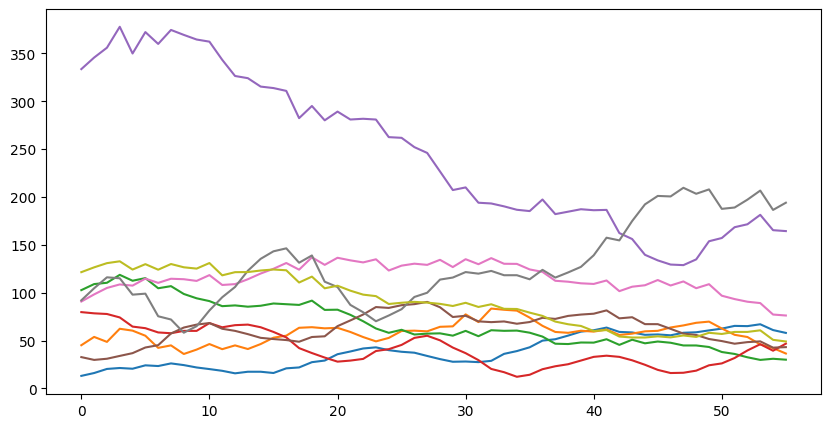

In [8]:
# ÁªòÂà∂Êú™Â§ÑÁêÜÁöÑCSIÂõæÂÉè
# Draw unprocessed CSI image
csi_frame_amplitude = extract_amplitude(csi_frame)

# Â∞Ü tones x ntx x nrx ÁöÑÁü©ÈòµËΩ¨Êç¢‰∏∫ signals x tones ÁöÑÁü©Èòµ
# Convert the tones x ntx x nrx matrix to the signals x tones matrix
csi_frame_amplitude = csi_frame_amplitude.reshape((csi_frame_amplitude.shape[0], -1))

# ÁªòÂà∂CSIÊõ≤Á∫øÂõæ
# Draw CSI curve
plt.figure(figsize=(10, 5))
plt.plot(csi_frame_amplitude)
plt.show()

### Test the function

## Calculate the dB of a complex array

The dB of a complex number is defined as:

$$dB = 20\log_{10}{|z|}$$

In [9]:
def extract_dB(csi_abs_frame):
    """
    ‰ªéCSIÁü©Èòµ‰∏≠ÊèêÂèñdB‰ø°ÊÅØ

    @param csi_abs_frame: CSI matrix
    @return: dB matrix
    """

    csi_abs_frame += 1e-10
    csi_abs_frame = 20 * np.log10(csi_abs_frame)
    return csi_abs_frame

### Test the function

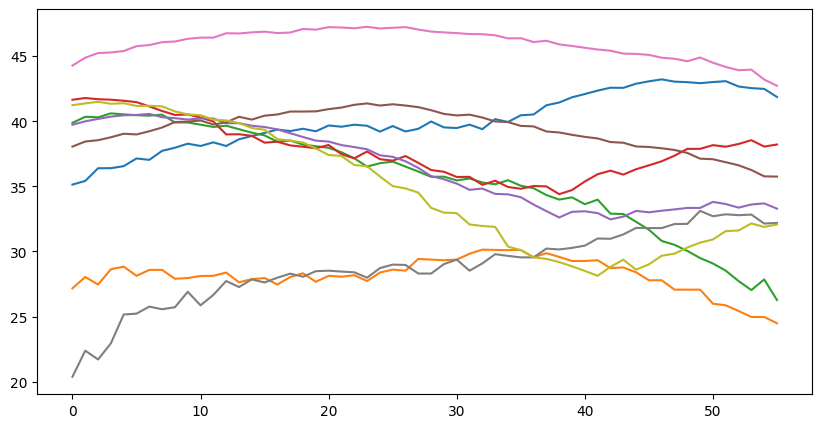

In [10]:
# ‰ªéËØïÈ™åÊï∞ÊçÆ‰∏≠ÊµãËØï‰ª•‰∏äÂáΩÊï∞
# Test the above functions from the experimental data
csi_frame = csi_pd['csi_matrix'][100]

# ÁªòÂà∂Êú™Â§ÑÁêÜÁöÑCSIÂõæÂÉè
# Draw unprocessed CSI image
csi_frame_amplitude = extract_amplitude(csi_frame)

# Â∞Ü tones x ntx x nrx ÁöÑÁü©ÈòµËΩ¨Êç¢‰∏∫ signals x tones ÁöÑÁü©Èòµ
# Convert the tones x ntx x nrx matrix to the signals x tones matrix
csi_frame_amplitude = csi_frame_amplitude.reshape((csi_frame_amplitude.shape[0], -1))

# ËÆ°ÁÆódBÂÄº
# Calculate dB value
csi_frame_amplitude = extract_dB(csi_frame_amplitude)

# ÁªòÂà∂CSIÊõ≤Á∫øÂõæ
# Draw CSI curve
plt.figure(figsize=(10, 5))
plt.plot(csi_frame_amplitude)
plt.show()

## Calcuate the phase of a complex array

The phase of a complex number is defined as:

$$\theta = \arctan{\frac{b}{a}}$$

In [11]:
def extract_phase1(csi_frame):
    """
    ‰ªéCSIÁü©Èòµ‰∏≠ÊèêÂèñÁõ∏‰Ωç‰ø°ÊÅØ
    Extract phase information from CSI matrix

    @param csi_frame_matrix: CSI matrix
    @return: phase matrix
    """

    # ËÆ°ÁÆóÁõ∏‰Ωç‰ø°ÊÅØ
    # Calculate phase information
    complex_frame = csi_frame[:, :, :, 0] + 1j * csi_frame[:, :, :, 1]

    # ÊèêÂèñÁõ∏‰Ωç‰ø°ÊÅØ
    # Extract phase information
    phase_frame = np.angle(complex_frame)

    return phase_frame


In [12]:
def extract_phase2(csi_frame):
    """
    ‰ªéCSIÁü©Èòµ‰∏≠ÊèêÂèñÁõ∏‰Ωç‰ø°ÊÅØ
    Extract phase information from CSI matrix

    @param csi_frame_matrix: CSI matrix
    @return: phase matrix
    """

    # ËÆ°ÁÆóÁõ∏‰Ωç‰ø°ÊÅØÔºåÂêåÊó∂ÈÅøÂÖçÈô§Êï∞‰∏∫0ÔºåÊàë‰ª¨Âú®ÂÆûÈÉ®‰∏äÂä†‰∏ä‰∏Ä‰∏™ÂæàÂ∞èÁöÑÊï∞
    # Calculate phase information
    csi_frame[:, :, :, 0] = csi_frame[:, :, :, 0] + 1e-10

    # ÊèêÂèñÁõ∏‰Ωç‰ø°ÊÅØ
    # Extract phase information
    phase_frame = np.arctan2(csi_frame[:, :, :, 1], csi_frame[:, :, :, 0])
    
    return phase_frame

In [13]:
def extract_phase3(csi_frame):
    """
    ‰ªéCSIÁü©Èòµ‰∏≠ÊèêÂèñÁõ∏‰Ωç‰ø°ÊÅØ
    Extract phase information from CSI matrix

    @param csi_frame_matrix: CSI matrix
    @return: phase matrix
    """

    # ËÆ°ÁÆóÁõ∏‰Ωç‰ø°ÊÅØÔºåÂêåÊó∂ÈÅøÂÖçÈô§Êï∞‰∏∫0ÔºåÊàë‰ª¨Âú®ÂÆûÈÉ®‰∏äÂä†‰∏ä‰∏Ä‰∏™ÂæàÂ∞èÁöÑÊï∞
    # Calculate phase information
    complex_frame = csi_frame[:, :, :, 1] / (csi_frame[:, :, :, 0] + 1e-10)

    # ÊèêÂèñÁõ∏‰Ωç‰ø°ÊÅØ
    # Extract phase information
    phase_frame = np.arctan(complex_frame)
    
    return phase_frame

### Test the function

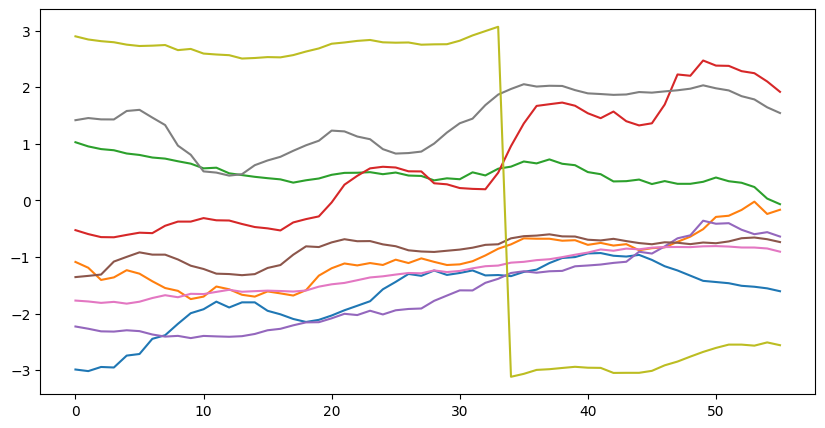

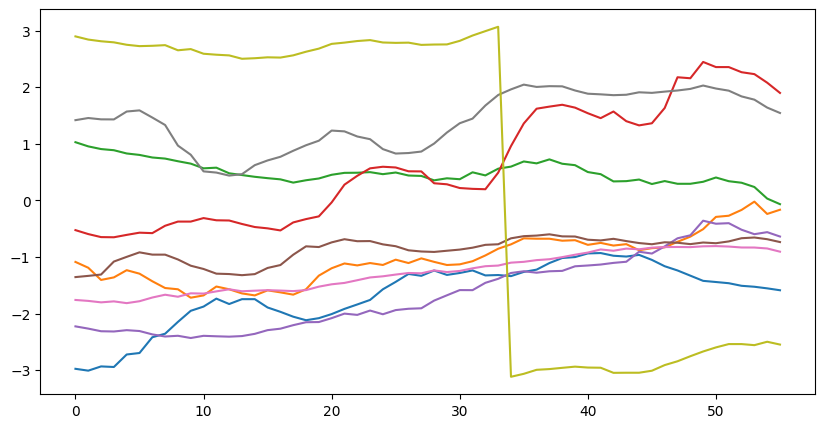

In [14]:
# ‰ªéËØïÈ™åÊï∞ÊçÆ‰∏≠ÊµãËØï‰ª•‰∏äÂáΩÊï∞
# Test the above functions from the experimental data
csi_frame = csi_pd['csi_matrix'][0]

# ËÆ°ÁÆóÁõ∏‰Ωç‰ø°ÊÅØ
# Calculate phase information
csi_frame_phase1 = extract_phase1(csi_frame)
csi_frame_phase2 = extract_phase2(csi_frame)
# csi_frame_phase3 = extract_phase3(csi_frame)

# Â∞Ü tones x ntx x nrx ÁöÑÁü©ÈòµËΩ¨Êç¢‰∏∫ signals x tones ÁöÑÁü©Èòµ
# Convert the tones x ntx x nrx matrix to the signals x tones matrix
csi_frame_phase1 = csi_frame_phase1.reshape((csi_frame_phase1.shape[0], -1))
csi_frame_phase2 = csi_frame_phase2.reshape((csi_frame_phase2.shape[0], -1))
# csi_frame_phase3 = csi_frame_phase3.reshape((csi_frame_phase3.shape[0], -1))

# ÁªòÂà∂‰∏§Âº†ÂõæÂàÜÂà´Â±ïÁ§∫Âú®‰∏çÂêåCanvas‰∏ä
plt.figure(figsize=(10, 5))
plt.plot(csi_frame_phase1)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(csi_frame_phase2)
plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(csi_frame_phase3)
# plt.show()


## Calculate the Unwrapped Phase of a complex array

In raw CSI samples (5 consecutive samples visualized in Figure 3(a-b)), the amplitude (A) and phase ($\Phi$) of each complex element $z = a +bi$ are computed using the formulation $ùê¥ = \sqrt{a^2 + b^2}$ and $\Phi = \arctan(b/a)$. Note that the range of the arctan function is from $\pi$ to $\pi$ and the phase values outside this range get wrapped, leading to a discontinuity in phase values. Our first sanitization step is to unwrap the phase following:

$$
\begin{matrix}
\Delta \phi_{i,j} = \Phi_{i, j+1} - \Phi_{i,j} \\
if \Delta \phi_{i, j} > \pi, \Phi_{i, j+1} = \Phi_{i, j} + \Delta \phi_{i, j} - 2\pi \\
if \Delta \phi_{i, j} < -\pi, \Phi_{i, j+1} = \Phi_{i, j} + \Delta \phi_{i, j} + 2\pi
\end{matrix}
$$

where $i$ denotes the index of the measurements in the five consecutive samples, and $j$ denotes the index of the subcarriers(frequencies). Following unwrapping, each of the flipping phase curves in Fig- ure 3(b) are restored to continuous curves in Figure 3(c).

In [15]:
def unwrap_phase(csi_reshaped_phase_with_five_samples):

    csi_reshaped_phase_unwrapped = np.copy(csi_reshaped_phase_with_five_samples)   # shape = (5, 3 x 3 x [114])

    for i in range(1, 5):
        delta_phase = csi_reshaped_phase_with_five_samples[i, :] - csi_reshaped_phase_with_five_samples[i - 1, :]    
        
        for j in range(delta_phase.shape[1]):
            if delta_phase[i, j] > np.pi:
                delta_phase[i, j] -= 2 * np.pi
            elif delta_phase[i, j] < -np.pi:
                delta_phase[i, j] += 2 * np.pi



def extract_unwrapped_phase(csi_frames):

    """
    csi_frames ÈúÄË¶ÅÁöÑÊòØ5‰∏™ËøûÁª≠ÁöÑCSIÂ∏ßÔºåÂõ†Ê≠§ËæìÂÖ•ÁöÑÈïøÂ∫¶Â∫îËØ•ÊòØ5ÁöÑÂÄçÊï∞
    csi_frames needs 5 consecutive CSI frames, so the input length should be a multiple of 5

    @param csi_frames: 5‰∏™ËøûÁª≠ÁöÑCSIÂ∏ß
    """

    # È¶ñÂÖàÈ™åËØÅËæìÂÖ•ÁöÑÈïøÂ∫¶ÊòØÂê¶ÊòØ5ÁöÑÂÄçÊï∞
    # First verify that the length of the input is a multiple of 5
    if len(csi_frames) % 5 != 0:
        print("The length of the input is not a multiple of 5!")
        return None

    # Ëé∑ÂèñÁõ∏‰Ωç‰ø°ÊÅØ
    # Get the phase information
    csi_frames_phase = [extract_phase1(csi_frame) for csi_frame in csi_frames]

    # ‰øÆÊîπÊï∞ÊçÆÁöÑÁª¥Â∫¶Ôºå‰ΩøÂÆÉÂèòÊàê (n, 3 x 3 x [114])
    # Modify the dimension of the data to make it (n, 3 x 3 x [114])
    csi_frames_phase = [csi_frame.reshape((csi_frame.shape[0], -1)) for csi_frame in csi_frames_phase]


